In [ ]:
%%capture
%%bash
wget https://github.com/leec0140/NYP107/raw/main/NYP107-2.v1i.yolov8.zip
mkdir -p datasets
unzip NYP107-2.v1i.yolov8.zip -d datasets/

In [ ]:
%%capture
!pip install ultralytics
!pip install comet_ml
!pip install wandb

In [ ]:
!wandb login 178db6736a4432c9853dafa81d2a7b50b3a97dae

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
from ultralytics import settings
from ultralytics import YOLO

settings.update({"wandb": True,
                 "comet": False,
                 "tensorboard": False})

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
%env PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True

env: PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True


In [ ]:
model = YOLO("yolov8s.pt")  # Load a pre-trained YOLO model


result = model.train(data="datasets/data.yaml",
                     cfg="datasets/hyp.yaml",
                     epochs=50,
                     save_period=1,
                     batch=16,
                     device=0,
                     project='lollipop-hershey',
                     plots=True,
                     # patience=10,  # Early stopping after 5 epochs of no improvement
                     # cos_lr=True  # Enable cosine learning rate decay
                     # learning rate will automatically decrease during training for better convergence
                     )

100%|██████████| 21.5M/21.5M [00:00<00:00, 257MB/s]


Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=datasets/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=1, cache=False, device=0, workers=8, project=lollipop-hershey, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxe

100%|██████████| 755k/755k [00:00<00:00, 17.9MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: leecherylleecheryl (leecherylleecheryl-nanyang-polytechnic). Use `wandb login --relogin` to force relogin


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 99.8MB/s]


AMP: checks passed ✅


train: Scanning /content/datasets/train/labels... 303 images, 0 backgrounds, 0 corrupt: 100%|██████████| 303/303 [00:00<00:00, 1139.06it/s]

train: New cache created: /content/datasets/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.24 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/datasets/valid/labels... 25 images, 0 backgrounds, 0 corrupt: 100%|██████████| 25/25 [00:00<00:00, 911.88it/s]

val: New cache created: /content/datasets/valid/labels.cache


Plotting labels to lollipop-hershey/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to lollipop-hershey/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      3.57G      1.661      1.984      1.689        220        640: 100%|██████████| 19/19 [00:05<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.47s/it]

                   all         25         98      0.823       0.88       0.94      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      3.61G      1.132       1.01      1.325        226        640: 100%|██████████| 19/19 [00:03<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.65it/s]


                   all         25         98      0.835      0.904      0.941      0.683

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      3.59G       1.12     0.9477      1.327        171        640: 100%|██████████| 19/19 [00:03<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.83it/s]


                   all         25         98      0.771       0.91      0.916      0.676

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      3.61G      1.111     0.8961      1.317        219        640: 100%|██████████| 19/19 [00:03<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.45it/s]


                   all         25         98      0.564      0.825      0.689       0.43

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      3.61G      1.091     0.8542      1.302        251        640: 100%|██████████| 19/19 [00:03<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.99it/s]


                   all         25         98      0.635      0.761      0.771      0.457

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      3.59G      1.128     0.8729      1.329        186        640: 100%|██████████| 19/19 [00:03<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.45it/s]

                   all         25         98      0.522      0.581       0.57      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      3.63G      1.043     0.8024      1.269        236        640: 100%|██████████| 19/19 [00:03<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.34it/s]

                   all         25         98      0.725      0.728        0.8      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      3.65G      1.085     0.8061      1.307        214        640: 100%|██████████| 19/19 [00:03<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.27it/s]

                   all         25         98      0.936      0.923      0.961      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      3.61G      1.038     0.7883       1.28        181        640: 100%|██████████| 19/19 [00:03<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.30it/s]

                   all         25         98      0.948      0.919      0.983       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      3.61G      1.047     0.7747      1.294        194        640: 100%|██████████| 19/19 [00:03<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.93it/s]

                   all         25         98       0.87      0.896      0.966      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      3.61G      1.037     0.7423      1.263        240        640: 100%|██████████| 19/19 [00:03<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.24it/s]

                   all         25         98      0.882      0.945      0.948      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      3.59G     0.9939     0.7254      1.259        224        640: 100%|██████████| 19/19 [00:03<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.37it/s]

                   all         25         98      0.966      0.963      0.987      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      3.63G     0.9797     0.6973      1.243        241        640: 100%|██████████| 19/19 [00:03<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.09it/s]

                   all         25         98      0.962       0.98      0.992       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      3.63G     0.9739     0.6904       1.24        215        640: 100%|██████████| 19/19 [00:03<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.50it/s]


                   all         25         98      0.975      0.971      0.988      0.776

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      3.61G     0.9564      0.685      1.237        248        640: 100%|██████████| 19/19 [00:03<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.37it/s]

                   all         25         98      0.979      0.962      0.982      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      3.61G     0.9472     0.6673      1.228        199        640: 100%|██████████| 19/19 [00:03<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.46it/s]

                   all         25         98      0.979      0.964      0.993      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      3.61G     0.9334     0.6428      1.204        253        640: 100%|██████████| 19/19 [00:03<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.94it/s]

                   all         25         98      0.987          1      0.995      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      3.61G     0.9329     0.6566      1.207        191        640: 100%|██████████| 19/19 [00:03<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.25it/s]

                   all         25         98      0.971          1      0.993      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      3.59G      0.921     0.6531      1.215        188        640: 100%|██████████| 19/19 [00:03<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.08it/s]

                   all         25         98      0.966      0.962      0.989      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      3.59G     0.9051     0.6394      1.205        215        640: 100%|██████████| 19/19 [00:03<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.40it/s]

                   all         25         98      0.983      0.971      0.992      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      3.61G     0.8965     0.6253      1.188        233        640: 100%|██████████| 19/19 [00:03<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.17it/s]

                   all         25         98       0.99      0.995      0.995      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      3.61G      0.904     0.6291      1.196        210        640: 100%|██████████| 19/19 [00:03<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.45it/s]

                   all         25         98      0.982          1      0.995      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      3.61G     0.8756     0.6037      1.182        196        640: 100%|██████████| 19/19 [00:03<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.69it/s]


                   all         25         98      0.968          1      0.994      0.821

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      3.65G     0.8596     0.6008      1.168        216        640: 100%|██████████| 19/19 [00:03<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.80it/s]

                   all         25         98      0.975       0.99      0.994      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      3.61G     0.8752     0.6086      1.181        226        640: 100%|██████████| 19/19 [00:03<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.40it/s]

                   all         25         98      0.979      0.981       0.99      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      3.59G     0.8503      0.597      1.171        178        640: 100%|██████████| 19/19 [00:03<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.46it/s]

                   all         25         98      0.997       0.99      0.995      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      3.61G     0.8537     0.5813      1.169        197        640: 100%|██████████| 19/19 [00:03<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.08it/s]

                   all         25         98      0.994       0.99      0.995       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      3.61G     0.8755     0.6025      1.187        214        640: 100%|██████████| 19/19 [00:03<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.68it/s]


                   all         25         98      0.993      0.998      0.995      0.841

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      3.61G     0.8255     0.5667      1.155        204        640: 100%|██████████| 19/19 [00:03<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.88it/s]

                   all         25         98      0.991          1      0.995      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      3.61G     0.8247      0.558      1.146        228        640: 100%|██████████| 19/19 [00:03<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.89it/s]

                   all         25         98      0.989       0.99      0.995      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      3.63G     0.8451      0.573       1.16        240        640: 100%|██████████| 19/19 [00:03<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.37it/s]

                   all         25         98      0.966      0.984      0.994      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      3.61G     0.8354     0.5681      1.166        203        640: 100%|██████████| 19/19 [00:03<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.13it/s]

                   all         25         98      0.997      0.988      0.995      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      3.63G     0.8063     0.5513      1.144        238        640: 100%|██████████| 19/19 [00:03<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.03it/s]

                   all         25         98      0.988      0.995      0.995      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      3.59G     0.8125     0.5435      1.144        222        640: 100%|██████████| 19/19 [00:03<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.32it/s]

                   all         25         98      0.965      0.998      0.994      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      3.61G     0.7969     0.5434      1.136        220        640: 100%|██████████| 19/19 [00:03<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.35it/s]

                   all         25         98      0.988      0.996      0.995      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      3.61G     0.7891     0.5349      1.131        214        640: 100%|██████████| 19/19 [00:03<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.24it/s]

                   all         25         98      0.997          1      0.995      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      3.61G     0.7886     0.5147      1.122        205        640: 100%|██████████| 19/19 [00:03<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.94it/s]


                   all         25         98      0.988          1      0.995      0.849

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      3.61G     0.7796     0.5131      1.116        235        640: 100%|██████████| 19/19 [00:03<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.32it/s]

                   all         25         98      0.994          1      0.995      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      3.63G     0.7711     0.5165      1.112        237        640: 100%|██████████| 19/19 [00:03<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.10it/s]

                   all         25         98      0.991          1      0.995      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      3.59G      0.769     0.5065      1.121        208        640: 100%|██████████| 19/19 [00:03<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.31it/s]

                   all         25         98      0.983       0.99      0.994      0.842


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      3.54G     0.5581      0.426     0.9827         58        640: 100%|██████████| 19/19 [00:03<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.37it/s]

                   all         25         98       0.98      0.996      0.994      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      3.55G     0.5326     0.3192     0.9499         63        640: 100%|██████████| 19/19 [00:03<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.33it/s]

                   all         25         98      0.996      0.985      0.995      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      3.54G     0.5351     0.3079     0.9525         60        640: 100%|██████████| 19/19 [00:03<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.36it/s]

                   all         25         98      0.984          1      0.995      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      3.54G     0.5254     0.2951     0.9516         61        640: 100%|██████████| 19/19 [00:03<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.47it/s]

                   all         25         98      0.966          1      0.995      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      3.54G     0.5193     0.3035     0.9541         68        640: 100%|██████████| 19/19 [00:03<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.46it/s]

                   all         25         98      0.972          1      0.995      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      3.55G       0.51     0.2849     0.9314         62        640: 100%|██████████| 19/19 [00:03<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.43it/s]

                   all         25         98      0.986          1      0.995      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      3.54G     0.4895     0.2759     0.9315         56        640: 100%|██████████| 19/19 [00:03<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.31it/s]

                   all         25         98      0.989          1      0.995      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      3.54G     0.4915     0.2745     0.9381         68        640: 100%|██████████| 19/19 [00:03<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.55it/s]

                   all         25         98      0.986       0.99      0.995      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      3.54G     0.4864     0.2749     0.9394         60        640: 100%|██████████| 19/19 [00:03<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.49it/s]

                   all         25         98       0.99       0.99      0.995      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      3.54G     0.4845     0.2694     0.9331         68        640: 100%|██████████| 19/19 [00:03<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.34it/s]

                   all         25         98      0.986      0.991      0.995      0.881



50 epochs completed in 0.059 hours.
Optimizer stripped from lollipop-hershey/train/weights/last.pt, 22.5MB
Optimizer stripped from lollipop-hershey/train/weights/best.pt, 22.5MB

Validating lollipop-hershey/train/weights/best.pt...
Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.80it/s]


                   all         25         98      0.987       0.99      0.995       0.88
        hershey kisses         14         46      0.992          1      0.995      0.863
              lollipop         16         52      0.982      0.981      0.995      0.896
Speed: 0.2ms preprocess, 2.2ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to lollipop-hershey/train


lr/pg0,▂▄▅▇█████▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg1,▂▄▅▇█████▇▇▇▇▇▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg2,▂▄▅▇█████▇▇▇▇▇▆▆▆▆▆▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▁▁▁
metrics/mAP50(B),▇▇▆▁▃▇█▇▇███████████████████████████████
metrics/mAP50-95(B),▆▅▅▁▁▂▅▅▅▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇█▇▇███▇▇███████
metrics/precision(B),▅▅▄▁▂▄▇▇▆▆▇███████████████▇█████████████
metrics/recall(B),▅▆▆▄▂▁▆▆▅▇▇▇▇▇█▇▇███████████████████████
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,█▅▅▅▅▄▅▄▄▄▄▄▄▄▄▄▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▁▁▁▁▁▁▁


In [ ]:
from ultralytics import YOLO

model = YOLO("lollipop-hershey/train/weights/best.pt")
validation_results = model.val(data="datasets/data.yaml", device=0)

Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /content/datasets/valid/labels.cache... 25 images, 0 backgrounds, 0 corrupt: 100%|██████████| 25/25 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.19it/s]


                   all         25         98      0.986      0.991      0.995       0.88
        hershey kisses         14         46      0.992          1      0.995      0.862
              lollipop         16         52      0.981      0.983      0.995      0.898
Speed: 0.2ms preprocess, 11.9ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/val


In [ ]:
from ultralytics.utils.benchmarks import benchmark

# Benchmark on GPU
benchmark(model="lollipop-hershey/train/weights/best.pt", data="datasets/data.yaml", imgsz=640, half=False, device=0)
# If you are benchmarking for CPU only, the change the device=0 to device='cpu'

Setup complete ✅ (12 CPUs, 53.0 GB RAM, 53.6/235.7 GB disk)

Benchmarks complete for best.pt on datasets/data.yaml at imgsz=640 (617.37s)
                   Format Status❔  Size (MB)  metrics/mAP50-95(B)  Inference time (ms/im)     FPS
0                 PyTorch       ✅       21.5               0.7523                   12.61   79.31
1             TorchScript       ✅       42.9               0.7267                    3.89  257.30
2                    ONNX       ❎       42.7                  NaN                     NaN     NaN
3                OpenVINO       ❌        0.0                  NaN                     NaN     NaN
4                TensorRT       ✅       59.8               0.7267                    3.10  322.13
5                  CoreML       ❌        0.0                  NaN                     NaN     NaN
6   TensorFlow SavedModel       ✅      106.7               0.7267                   22.22   45.00
7     TensorFlow GraphDef       ✅       42.7               0.7267             

,Format,Status❔,Size (MB),metrics/mAP50-95(B),Inference time (ms/im),FPS
0,PyTorch,✅,21.5,0.7523,12.61,79.31
1,TorchScript,✅,42.9,0.7267,3.89,257.30
2,ONNX,❎,42.7,NaN,NaN,NaN
3,OpenVINO,❌,0.0,NaN,NaN,NaN
4,TensorRT,✅,59.8,0.7267,3.10,322.13
5,CoreML,❌,0.0,NaN,NaN,NaN
6,TensorFlow SavedModel,✅,106.7,0.7267,22.22,45.00
7,TensorFlow GraphDef,✅,42.7,0.7267,73.93,13.53
8,TensorFlow Lite,❌,0.0,NaN,NaN,NaN
9,TensorFlow Edge TPU,❌,0.0,NaN,NaN,NaN


In [ ]:
# Get OpenVINO file
model = YOLO("lollipop-hershey/train/weights/best.pt")
exported_path = model.export(format="openvino", int8=True)
# openvino model in lollipop-hershey\train\weights\best_openvino_model directory

Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
WARNING ⚠️ INT8 export requires a missing 'data' arg for calibration. Using default 'data=coco8.yaml'.
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs

PyTorch: starting from 'lollipop-hershey/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 6, 8400) (21.5 MB)
requirements: Ultralytics requirement ['openvino>=2024.5.0'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 MB 230.0 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 4.7s, installed 1 package: ['openvino>=2024.5.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


OpenVINO: starting export with openvino 2024.6.0-17404-4c0f47d2335-releases/2024/6...
requirements: Ultralytics requirement ['nncf>=2.14.0'] not found, attempting AutoUpdate...
  Preparing metadata (setup.py): started
  Preparing metadata (setup.

100%|██████████| 433k/433k [00:00<00:00, 13.7MB/s]
Unzipping /content/datasets/coco8.zip to /content/datasets/coco8...: 100%|██████████| 25/25 [00:00<00:00, 3811.76file/s]

Dataset download success ✅ (0.9s), saved to /content/datasets




Scanning /content/datasets/coco8/labels/val... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<00:00, 1365.11it/s]

New cache created: /content/datasets/coco8/labels/val.cache
OpenVINO: WARNING ⚠️ >300 images recommended for INT8 calibration, found 4 images.


INFO:nncf:16 ignored nodes were found by patterns in the NNCFGraph
INFO:nncf:1 ignored nodes were found by types in the NNCFGraph
INFO:nncf:Not adding activation input quantizer for operation: 161 __module.model.22.dfl/aten::view/Reshape
INFO:nncf:Not adding activation input quantizer for operation: 162 __module.model.22/aten::sigmoid/Sigmoid
INFO:nncf:Not adding activation input quantizer for operation: 172 __module.model.22.dfl/aten::transpose/Transpose
INFO:nncf:Not adding activation input quantizer for operation: 181 __module.model.22.dfl/aten::softmax/Softmax
INFO:nncf:Not adding activation input quantizer for operation: 190 __module.model.22.dfl.conv/aten::_convolution/Convolution
INFO:nncf:Not adding activation input quantizer for operation: 197 __module.model.22.dfl/aten::view/Reshape_1
INFO:nncf:Not adding activation input quantizer for operation: 209 __module.model.22/aten::sub/Subtract
INFO:nncf:Not adding activation input quantizer for operation: 210 __module.model.22/aten:

Output()

Output()

OpenVINO: export success ✅ 28.1s, saved as 'lollipop-hershey/train/weights/best_int8_openvino_model/' (11.2 MB)

Export complete (29.9s)
Results saved to /content/lollipop-hershey/train/weights
Predict:         yolo predict task=detect model=lollipop-hershey/train/weights/best_int8_openvino_model imgsz=640 int8 
Validate:        yolo val task=detect model=lollipop-hershey/train/weights/best_int8_openvino_model imgsz=640 data=datasets/data.yaml int8 
Visualize:       https://netron.app


In [ ]:
# Download the Model

%%bash
mv ./lollipop-hershey/train/weights/best_int8_openvino_model/ .
zip -r best_int8_openvino_model.zip best_int8_openvino_model

# Download the best_openvino_model.zip file

  adding: best_int8_openvino_model/ (stored 0%)
  adding: best_int8_openvino_model/best.xml (deflated 95%)
  adding: best_int8_openvino_model/best.bin (deflated 15%)
  adding: best_int8_openvino_model/metadata.yaml (deflated 32%)


In [ ]:
%%capture
%%bash
wget https://github.com/leec0140/NYP107/raw/main/01_test.zip
mkdir -p test_objects
unzip 01_test.zip -d test_objects/

Loading best_int8_openvino_model for OpenVINO inference...
Using OpenVINO LATENCY mode for batch=1 inference...

image 1/1 /content/test_objects/test_pic.jpg: 640x640 4 hershey kissess, 4 lollipops, 30.2ms
Speed: 3.2ms preprocess, 30.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'hershey kisses', 1: 'lollipop'}
obb: None
orig_img: array([[[  7,   8,   4],
        [ 22,  23,  19],
        [ 24,  22,  21],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1]],

       [[  5,   6,   2],
        [ 18,  19,  15],
        [ 20,  18,  17],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1]],

       [[  9,  10,   6],
        [ 19,  20,  16],
        [ 22,  20,  19],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1]],

   

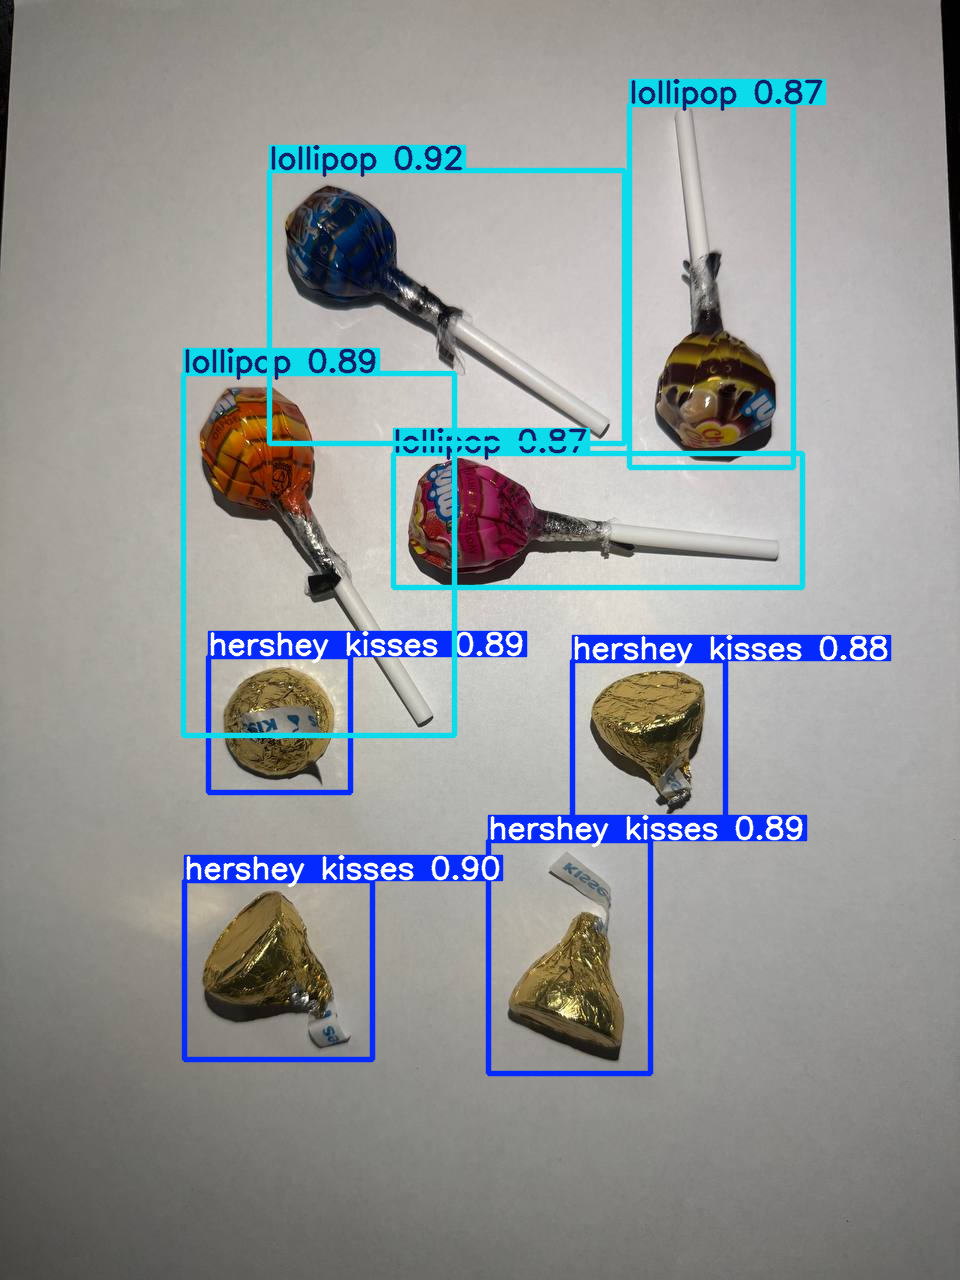

In [ ]:
# Test our model

import ultralytics
from ultralytics import YOLO
from PIL import Image

test_image = "test_objects/test_pic.jpg"
model = YOLO("best_int8_openvino_model", task='detect')
result = model(test_image, conf=0.5, iou=0.6)

# Visualize the results
for i, r in enumerate(result):
    print(r)
    # Plot results image
    im_bgr = r.plot()  # BGR-order numpy array
    im_rgb = Image.fromarray(im_bgr[..., ::-1])  # RGB-order PIL image

    # Show results to screen (in supported environments)
    r.show()

    # Save results to disk
    r.save(filename=f"test_results{i}.jpg")

In [ ]:
from ultralytics import YOLO
import cv2
# from tqdm import tqdm
from tqdm.auto import tqdm

def write_video(video_in_filepath, video_out_filepath, model):
    # Open the video file

    video_reader = cv2.VideoCapture(video_in_filepath)

    nb_frames = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))
    frame_h = int(video_reader.get(cv2.CAP_PROP_FRAME_HEIGHT))
    frame_w = int(video_reader.get(cv2.CAP_PROP_FRAME_WIDTH))
    fps = video_reader.get(cv2.CAP_PROP_FPS)

    video_writer = cv2.VideoWriter(video_out_filepath,
                            cv2.VideoWriter_fourcc(*'mp4v'),
                            fps,
                            (frame_w, frame_h))

    # Loop through the video frames
    for i in tqdm(range(nb_frames)):
        # Read a frame from the video
        success, frame = video_reader.read()

        if success:
            # Run YOLO inference on the frame on GPU Device 0
            results = model(frame, conf=0.8, device=0)

            # Visualize the results on the frame
            annotated_frame = results[0].plot()

            # Write the annotated frame
            video_writer.write(annotated_frame)

    video_reader.release()
    video_writer.release()
    cv2.destroyAllWindows()
    cv2.waitKey(1)

In [ ]:
%%capture
%%bash
wget https://github.com/leec0140/NYP107/raw/main/test.zip
unzip test.zip

In [ ]:
from pathlib import Path
import os

video_in_file = "test.MOV"
basename = Path(video_in_file).stem
video_out_file = os.path.join(basename + '_detected' + '.mp4')
model = YOLO("best_int8_openvino_model", task="detect")
write_video(video_in_file, video_out_file, model)

  0%|          | 0/1866 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
0: 640x640 3 hershey kissess, 1 lollipop, 25.8ms
Speed: 2.3ms preprocess, 25.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 hershey kissess, 1 lollipop, 25.3ms
Speed: 2.9ms preprocess, 25.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 hershey kissess, 1 lollipop, 25.0ms
Speed: 2.5ms preprocess, 25.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 hershey kissess, 1 lollipop, 25.2ms
Speed: 2.3ms preprocess, 25.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 hershey kissess, 1 lollipop, 25.1ms
Speed: 2.4ms preprocess, 25.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 hershey kissess, 1 lollipop, 25.5ms
Speed: 2.3ms preprocess, 25.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 hershey kissess, 1 lollipop, 26.9ms
Speed: 2.3ms prepr